# Observasi

In [1]:
import json
import pymongo
from pymongo import MongoClient

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()

# Pipeline

## category

In [3]:
with open('category.json', 'r') as out:
    data = json.load(out)
    data = data[0]

In [4]:
datas = data['data']['categoryAllListLite']['categories']

In [5]:
def find_categ_name(id):
    for data in datas:
        if str(id) == str(data['id']):
            return data['name']
    return None

In [6]:
def categ_to_name(datas):
    for data in datas:
        name = find_categ_name(data['_id'])
        data['_id'] = name
        
    return datas

# Connecting Mongo

In [7]:
client = MongoClient('localhost:9700')
db = client.tokpedstat

# common function

In [8]:
def grafik(df, dimensi=[13, 9], name=None):
    fig_dims = dimensi
    fig, ax = plt.subplots(figsize=fig_dims)

    g = sns.barplot(data = df, x='_id', y='total', ax=ax)
    g.set_xticklabels(g.get_xticklabels(), rotation=40)
    
    if name:
        fig.savefig('img/{}.png'.format(name))
        
    plt.show(g)

# Stat By Category

In [9]:
aggr = [
    {
        "$group": {
            "_id": "$cat_id_1",
            "total": { "$sum": 1 }
        }
    }
]

hasil = db.product.aggregate(aggr)
hasil = list(hasil)
hasil = categ_to_name(hasil)
df = pd.DataFrame.from_records(hasil)
df = df.fillna(value='kosong')

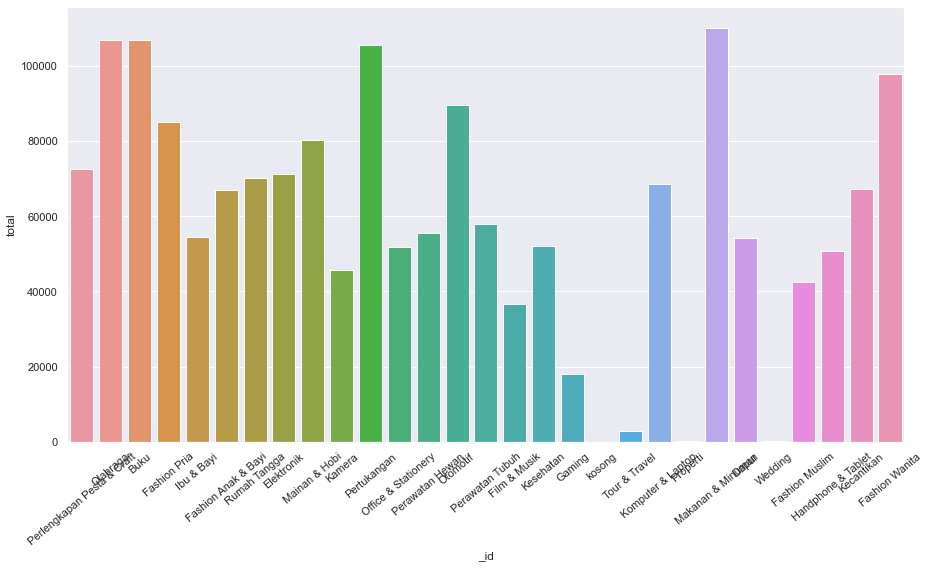

In [10]:
grafik(df, (15,8), 'kategori')

# Timeline created data

In [28]:
aggr = [
    {
        "$group": {
            "_id": { "$dateToString": { "format": "%Y-%m-%d", "date": "$created" } },
            "total": { "$sum": 1 }
        }
    }
]

hasilc = db.product.aggregate(aggr)
hasilc = list(hasilc)
df = pd.DataFrame.from_records(hasilc)
df = df.fillna(value='kosong')

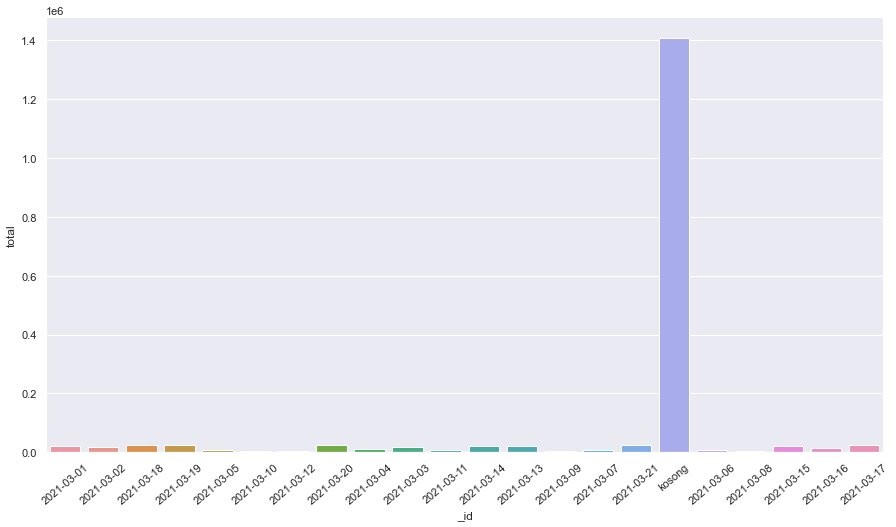

In [29]:
grafik(df, (15,8), 'create')

## Without null Value

In [30]:
cleanhasilc = list(filter(lambda x:bool(x), hasilc))
df = pd.DataFrame.from_records(cleanhasilc)
df.describe()

,total
count,2.200000e+01
mean,7.823377e+04
std,2.971685e+05
min,2.933000e+03
25%,6.248250e+03
50%,1.782150e+04
75%,2.287025e+04
max,1.408251e+06


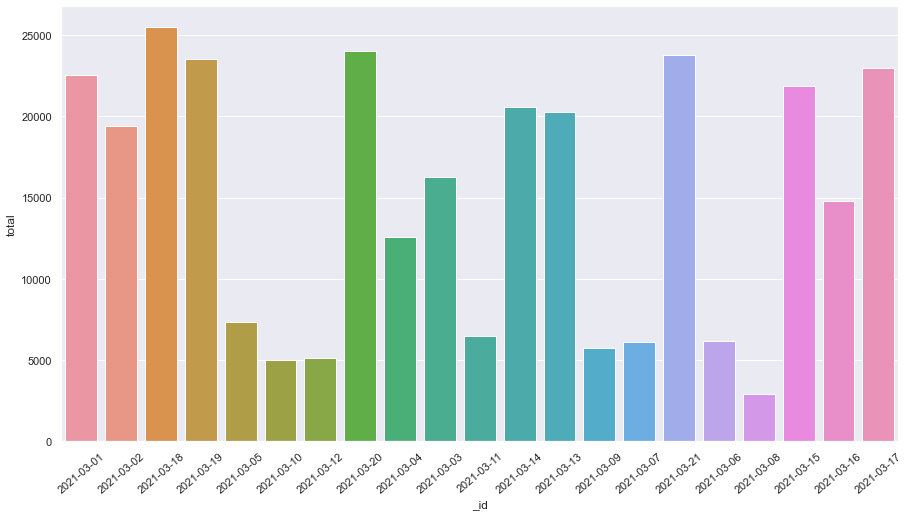

In [31]:
grafik(df, (15,8), 'create_not_null')

# Checking Last up Data

In [26]:
aggr = [ 
    {
        "$group": {
            "_id": { "$dateToString": { "format": "%Y-%m-%d", "date": "$last_updated" } },
            "total": { "$sum": 1 }
        }
    }
]

hasillast = db.product.aggregate(aggr)
hasillast = list(hasillast)
df = pd.DataFrame.from_records(hasillast)
df = df.fillna(value='kosong')
df.describe()

,total
count,8.000000
mean,215144.750000
std,360079.252103
min,1.000000
25%,1.000000
50%,1.000000
75%,282687.500000
max,902673.000000


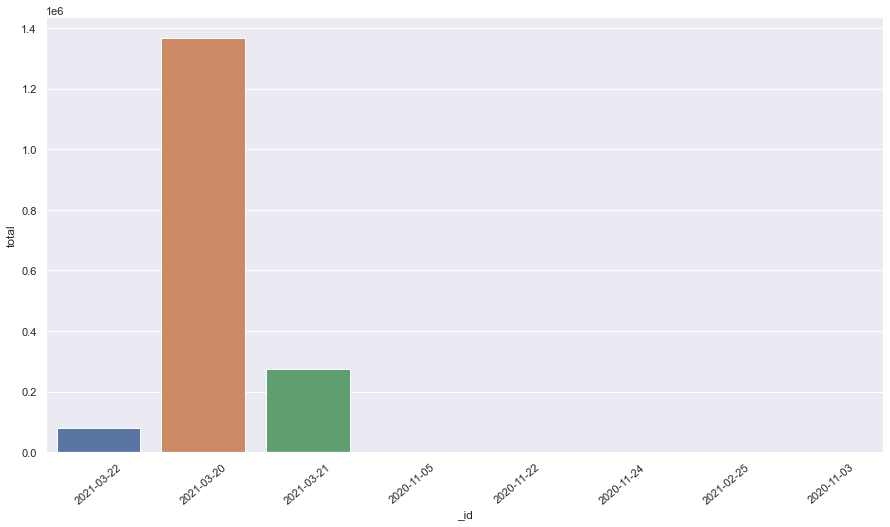

In [16]:
grafik(df, (15,8), 'last_update')

# Statistik Toko

In [17]:
aggr = [
    {
        "$group": {
            "_id": { "$dateToString": { "format": "%Y-%m-%d", "date": "$created" } },
            "total": { "$sum": 1 }
        }
    }
]

hasilc = db.toko.aggregate(aggr)
hasilc = list(hasilc)
df = pd.DataFrame.from_records(hasilc)
df = df.fillna(value='kosong')

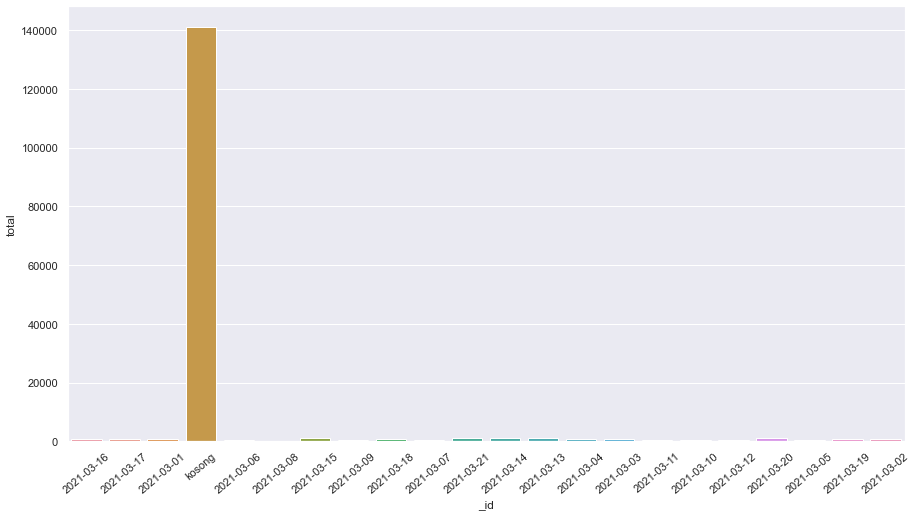

In [18]:
grafik(df, (15,8), 'shop_created')

In [19]:
cleanhasilc = list(filter(lambda x:bool(x), hasilc))
df = pd.DataFrame.from_records(cleanhasilc)

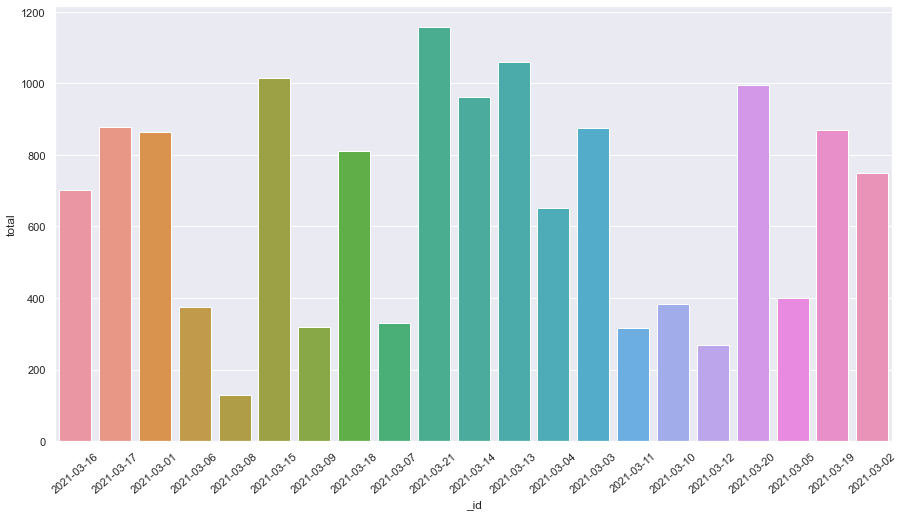

In [20]:
grafik(df, (15,8), 'shop_created_notnull')

In [21]:
aggr = [
    { "$match": { "rating": { "$gte": 5 } }},
    {
        "$group": {
            "_id": "$location",
            "total": { "$sum": 1 }
        }
    },
    { "$sort": { "total": -1 } },
    { "$limit": 20 }
]

hasil = db.toko.aggregate(aggr)
hasil = list(hasil)

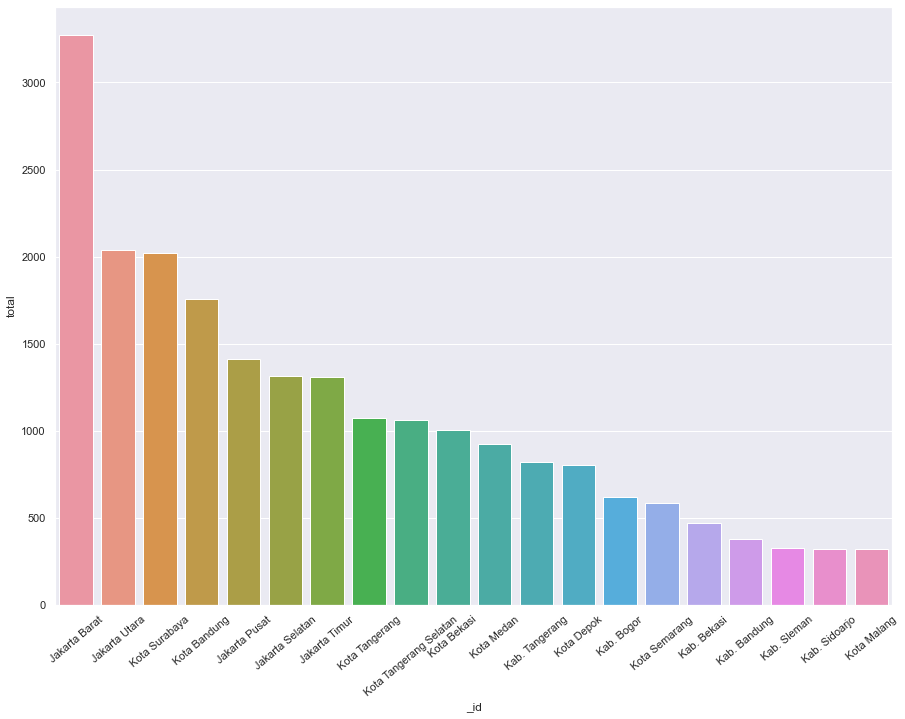

In [22]:
df = pd.DataFrame.from_records(hasil)
df = df.fillna(value='kosong')

fig_dims = (15, 11)
fig, ax = plt.subplots(figsize=fig_dims)

g = sns.barplot(data = df, x='_id', y='total', ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=40)
plt.show(g)

# query data

In [23]:
db.product.count()

f:\python3\environment\stattest\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  """Entry point for launching an IPython kernel.


1721537

# stat produk 

In [24]:
db.product.find_one()

{'_id': 406936069,
 'shop': {'_id': 338447,
  'username': 'ferrygolf75',
  'percent_tx': 97.619,
  'location': 'Jakarta Timur',
  'rating': 4.8,
  'score_map': 11,
  'kecepatan': 4},
 'itemid': 406936069,
 'name': 'Tee Karet Driving Golf Rubber 5,6,7',
 'price': 25000,
 'shopid': 338447,
 'url': 'https://www.tokopedia.com/ferrygolf75/tee-karet-driving-golf-rubber-5-6-7',
 'description': '',
 'weight': 10,
 'last_updated': datetime.datetime(2021, 3, 22, 13, 7, 54, 169000),
 'images': ['https://ecs7.tokopedia.net/img/cache/300/product-1/2019/2/11/338447/338447_5d85ec8d-51a1-41aa-bfd4-a0dfb66c7e40_720_720.jpg',
  'https://ecs7.tokopedia.net/img/cache/300/product-1/2019/2/11/338447/338447_2dc40ee1-5111-4659-a9e6-6f0f60fa068d_720_720.jpg',
  'https://ecs7.tokopedia.net/img/cache/300/product-1/2019/2/11/338447/338447_8e096802-772f-42f2-8c20-586639d6dbeb_720_720.jpg',
  'https://ecs7.tokopedia.net/img/cache/300/product-1/2019/2/11/338447/338447_25a8d992-2bc3-43c7-a2f8-5c17dc6506b1_720_720.jpg

In [25]:
products = db.product.find({}).sort("tx_week", pymongo.DESCENDING).limit(20)
for prod in products:
    print(prod)

{'_id': 672374004, 'shop': {'_id': 605, 'username': 'sumberjayamotor', 'percent_tx': 98.705, 'location': 'Jakarta Barat', 'rating': 4.8, 'score_map': 17, 'kecepatan': 5}, 'itemid': 672374004, 'name': 'Jas Hujan AXIO Europe Original - Merah, L', 'price': 198000, 'shopid': 605, 'url': 'https://www.tokopedia.com/sumberjayamotor/jas-hujan-axio-europe-original-merah-l', 'description': '', 'weight': 1298, 'last_updated': datetime.datetime(2021, 3, 20, 12, 59, 38, 452000), 'images': ['https://ecs7.tokopedia.net/img/cache/300/product-1/2019/11/13/22934932/22934932_72801d53-30ba-41f2-9b55-c36082a23107_1422_1422.jpg', 'https://ecs7.tokopedia.net/img/cache/300/product-1/2017/11/30/22934932/22934932_e47609c3-91e3-49a8-b0a8-b9fa00657d57_700_700.jpg', 'https://ecs7.tokopedia.net/img/cache/300/product-1/2018/4/24/22934932/22934932_625268fd-48f5-4be0-b07b-c90ed562871b_481_334.jpg', 'https://ecs7.tokopedia.net/img/cache/300/product-1/2019/1/21/22934932/22934932_6845bd9f-2841-46cc-a7dc-34488e9d4f97_980_

# class nyoba
